# How to use an API + API Test Notebook

In [9]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

#Origial URL from the API Documentation url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4fb9d20e-5c17-47b5-8282-2812ac425236',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10"
# into the Anaconda prompt to change this allow to pull data

#if that didn't work try using the local host URL as after puting above command.



In [10]:
type(data)

dict

In [ ]:
import pandas as pd

#This allows you to see all the colums, not just 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
#This normalises the data and makes it all pretty in the dataframes

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11655,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974744e+07,1.974744e+07,False,NaN,1,NaN,NaN,None,2024-08-31T05:41:00.000Z,59276.592852,2.982286e+10,-9.1788,-0.000389,0.635629,-7.341738,-7.539569,-5.856535,-12.483193,1.170561e+12,56.1437,1.244808e+12,None,2024-08-31T05:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
1,1027,Ethereum,ETH,ethereum,9254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203034e+08,1.203034e+08,True,NaN,2,NaN,NaN,None,2024-08-31T05:40:00.000Z,2526.297729,1.441090e+10,2.5683,0.060991,0.410823,-8.158107,-20.356572,-26.837374,-33.669571,3.039221e+11,14.5770,3.039221e+11,None,2024-08-31T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
2,825,Tether USDt,USDT,tether,96055,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.182258e+11,1.202519e+11,True,NaN,3,NaN,NaN,None,2024-08-31T05:40:00.000Z,0.999900,4.995810e+10,-4.5414,-0.000930,-0.005198,-0.093581,0.044219,0.108751,0.071362,1.182141e+11,5.6709,1.202399e+11,None,2024-08-31T05:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-31 15:42:29.610001
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459350e+08,1.459350e+08,False,NaN,4,NaN,NaN,None,2024-08-31T05:40:00.000Z,539.425634,1.580772e+09,2.0698,-0.096127,1.571339,-6.433266,-5.177484,-6.786699,-10.528147,7.872109e+10,3.7763,7.872109e+10,None,2024-08-31T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.664580e+08,5.835139e+08,True,NaN,5,NaN,NaN,None,2024-08-31T05:40:00.000Z,138.286342,2.444512e+09,10.0380,-0.170356,-0.275747,-10.448433,-18.100790,-7.007451,-16.662580,6.450477e+10,3.0938,8.069200e+10,None,2024-08-31T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
5,3408,USDC,USDC,usd-coin,21810,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.472322e+10,3.472322e+10,False,NaN,6,NaN,NaN,None,2024-08-31T05:40:00.000Z,1.000029,5.380465e+09,-17.0025,0.008628,0.015228,-0.012314,0.007283,0.004405,0.001764,3.472424e+10,1.6658,3.472424e+10,None,2024-08-31T05:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-31 15:42:29.610001
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-08-31T05:41:00.000Z,0.568025,1.008784e+09,-0.5302,0.329599,1.158943,-6.583527,-6.437531,18.533359,9.648893,3.195229e+10,1.5326,5.680249e+10,None,2024-08-31T05:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
7,74,Dogecoin,DOGE,dogecoin,1050,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457578e+11,1.457578e+11,True,NaN,8,NaN,NaN,None,2024-08-31T05:41:00.000Z,0.101876,5.779024e+08,23.4732,0.331867,1.708680,-9.472681,-15.363112,-17.615552,-36.114688,1.484928e+10,0.7122,1.484928e+10,None,2024-08-31T05:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
8,1958,TRON,TRX,tron,1020,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.678293e+1

In [35]:

def api_runner():
    global df
    #Origial URL from the API Documentation url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4fb9d20e-5c17-47b5-8282-2812ac425236',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10"
# into the Anaconda prompt to change this allow to pull data

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\subodh\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\subodh\Python Scripts\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\subodh\Python Scripts\API.csv', mode='a', header = False)
        

#if that didn't work try using the local host URL as after puting above command.

In [36]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #Sleep for 1 minute
exit()


API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df72 = pd.read_csv(r'C:\Users\subodh\Python Scripts\API.csv')
df72

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11655,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974744e+07,1.974744e+07,False,NaN,1,NaN,NaN,None,2024-08-31T05:41:00.000Z,59276.592852,2.982286e+10,-9.1788,-0.000389,0.635629,-7.341738,-7.539569,-5.856535,-12.483193,1.170561e+12,56.1437,1.244808e+12,None,2024-08-31T05:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
1,1027,Ethereum,ETH,ethereum,9254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203034e+08,1.203034e+08,True,NaN,2,NaN,NaN,None,2024-08-31T05:40:00.000Z,2526.297729,1.441090e+10,2.5683,0.060991,0.410823,-8.158107,-20.356572,-26.837374,-33.669571,3.039221e+11,14.5770,3.039221e+11,None,2024-08-31T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
2,825,Tether USDt,USDT,tether,96055,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.182258e+11,1.202519e+11,True,NaN,3,NaN,NaN,None,2024-08-31T05:40:00.000Z,0.999900,4.995810e+10,-4.5414,-0.000930,-0.005198,-0.093581,0.044219,0.108751,0.071362,1.182141e+11,5.6709,1.202399e+11,None,2024-08-31T05:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-31 15:42:29.610001
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459350e+08,1.459350e+08,False,NaN,4,NaN,NaN,None,2024-08-31T05:40:00.000Z,539.425634,1.580772e+09,2.0698,-0.096127,1.571339,-6.433266,-5.177484,-6.786699,-10.528147,7.872109e+10,3.7763,7.872109e+10,None,2024-08-31T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.664580e+08,5.835139e+08,True,NaN,5,NaN,NaN,None,2024-08-31T05:40:00.000Z,138.286342,2.444512e+09,10.0380,-0.170356,-0.275747,-10.448433,-18.100790,-7.007451,-16.662580,6.450477e+10,3.0938,8.069200e+10,None,2024-08-31T05:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
5,3408,USDC,USDC,usd-coin,21810,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.472322e+10,3.472322e+10,False,NaN,6,NaN,NaN,None,2024-08-31T05:40:00.000Z,1.000029,5.380465e+09,-17.0025,0.008628,0.015228,-0.012314,0.007283,0.004405,0.001764,3.472424e+10,1.6658,3.472424e+10,None,2024-08-31T05:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-31 15:42:29.610001
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-08-31T05:41:00.000Z,0.568025,1.008784e+09,-0.5302,0.329599,1.158943,-6.583527,-6.437531,18.533359,9.648893,3.195229e+10,1.5326,5.680249e+10,None,2024-08-31T05:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
7,74,Dogecoin,DOGE,dogecoin,1050,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457578e+11,1.457578e+11,True,NaN,8,NaN,NaN,None,2024-08-31T05:41:00.000Z,0.101876,5.779024e+08,23.4732,0.331867,1.708680,-9.472681,-15.363112,-17.615552,-36.114688,1.484928e+10,0.7122,1.484928e+10,None,2024-08-31T05:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 15:42:29.610001
8,1958,TRON,TRX,tron,1020,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.678293e+1

In [38]:
pd.set_option('display.float_format', lambda x:'%.5f' %x)

In [39]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11655,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19747443.00000,19747443.00000,False,NaN,1,NaN,NaN,None,2024-08-31T07:03:00.000Z,59160.61096,28911584094.07362,-11.87600,-0.05031,-0.26955,-7.76905,-7.87442,-5.71445,-12.70990,1168270792834.54053,56.14710,1242372830220.37012,None,2024-08-31T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 17:04:36.785037
1,1027,Ethereum,ETH,ethereum,9254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120303365.02210,120303365.02210,True,NaN,2,NaN,NaN,None,2024-08-31T07:02:00.000Z,2521.68560,14081413141.37933,0.80530,-0.03706,-0.22683,-8.57159,-20.45620,-26.76520,-33.83030,303367262936.79938,14.57480,303367262936.79999,None,2024-08-31T07:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 17:04:36.785037
2,825,Tether USDt,USDT,tether,96058,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118225843080.77164,120251893183.99535,True,NaN,3,NaN,NaN,None,2024-08-31T07:02:00.000Z,1.00003,48784270254.53092,-6.37780,0.00800,-0.00202,-0.05967,0.03863,0.11381,0.08859,118229478785.57066,5.68200,120255591194.28999,None,2024-08-31T07:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-31 17:04:36.785037
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935008.17101,145935008.17101,False,NaN,4,NaN,NaN,None,2024-08-31T07:02:00.000Z,536.93719,1563863942.98340,0.82690,-0.00551,0.58286,-7.03338,-5.53062,-7.23187,-10.73644,78357933336.82016,3.76580,78357933336.82001,None,2024-08-31T07:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 17:04:36.785037
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466457901.70466,583513809.14093,True,NaN,5,NaN,NaN,None,2024-08-31T07:02:00.000Z,138.02475,2355359606.44691,5.04350,0.23743,-1.11488,-10.50574,-18.09989,-6.45462,-16.95279,64382736503.68738,3.09320,80539349173.61000,None,2024-08-31T07:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 17:04:36.785037
5,3408,USDC,USDC,usd-coin,21810,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34723549148.97461,34723549148.97461,False,NaN,6,NaN,NaN,None,2024-08-31T07:02:00.000Z,1.00006,5263321017.63306,-18.43720,0.00527,0.02150,0.01396,0.00339,-0.00145,0.00393,34725665312.86172,1.66890,34725665312.86000,None,2024-08-31T07:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-31 17:04:36.785037
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56251561168.00000,99987294444.00000,False,NaN,7,NaN,NaN,None,2024-08-31T07:03:00.000Z,0.56768,966695407.01083,-3.38920,0.06445,0.79606,-7.17180,-6.72337,18.54333,9.52608,31932923708.61535,1.53470,56768066602.18000,None,2024-08-31T07:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-31 17:04:36.785037
7,74,Dogecoin,DOGE,dogecoin,1050,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145758366383.70526,145758366383.70526,True,NaN,8,NaN,NaN,None,2024-08-31T07:03:00.000Z,0.10160,569005694.03435,20.58250,0.15014,0.88968,-9.65529,-15.25748,-17.53825,-36.48431,14809130122.57945,0.71170,14809130122.58000,None,2024-08-31T07:03:00.000Z,N

In [43]:
df11 = df.groupby('name', sort =False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df11


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.05031,-0.26955,-7.76905,-7.87442,-5.71445,-12.70990
Ethereum,-0.03706,-0.22683,-8.57159,-20.45620,-26.76520,-33.83030
Tether USDt,0.00800,-0.00202,-0.05967,0.03863,0.11381,0.08859
BNB,-0.00551,0.58286,-7.03338,-5.53062,-7.23187,-10.73644
Solana,0.23743,-1.11488,-10.50574,-18.09989,-6.45462,-16.95279
USDC,0.00527,0.02150,0.01396,0.00339,-0.00145,0.00393
XRP,0.06445,0.79606,-7.17180,-6.72337,18.54333,9.52608
Dogecoin,0.15014,0.88968,-9.65529,-15.25748,-17.53825,-36.48431
TRON,-0.76704,-2.15653,-2.47769,21.93236,22.62279,38.77915


In [44]:
df12 = df11.stack()
df12

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.05031
              quote.USD.percent_change_24h    -0.26955
              quote.USD.percent_change_7d     -7.76905
              quote.USD.percent_change_30d    -7.87442
              quote.USD.percent_change_60d    -5.71445
                                                ...   
Bitcoin Cash  quote.USD.percent_change_24h     0.34009
              quote.USD.percent_change_7d     -9.59750
              quote.USD.percent_change_30d   -22.22983
              quote.USD.percent_change_60d   -16.07853
              quote.USD.percent_change_90d   -29.82172
Length: 90, dtype: float64

In [46]:
type(df12)

pandas.core.series.Series

In [48]:
df12 = df12.to_frame(name = 'values')
df12

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.05031
             quote.USD.percent_change_24h  -0.26955
             quote.USD.percent_change_7d   -7.76905
             quote.USD.percent_change_30d  -7.87442
             quote.USD.percent_change_60d  -5.71445
...                                             ...
Bitcoin Cash quote.USD.percent_change_24h   0.34009
             quote.USD.percent_change_7d   -9.59750
             quote.USD.percent_change_30d -22.22983
             quote.USD.percent_change_60d -16.07853
             quote.USD.percent_change_90d -29.82172

[90 rows x 1 columns]

In [49]:
type(df12)

pandas.core.frame.DataFrame

In [56]:
index = pd.Index(range(90))

df13 = df12.reset_index()
df13

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05031
1,Bitcoin,quote.USD.percent_change_24h,-0.26955
2,Bitcoin,quote.USD.percent_change_7d,-7.76905
3,Bitcoin,quote.USD.percent_change_30d,-7.87442
4,Bitcoin,quote.USD.percent_change_60d,-5.71445
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,0.34009
86,Bitcoin Cash,quote.USD.percent_change_7d,-9.59750
87,Bitcoin Cash,quote.USD.percent_change_30d,-22.22983
88,Bitcoin Cash,quote.USD.percent_change_60d,-16.07853


In [57]:
df14 = df13.rename(columns={'level_1': 'percent_change'})
df14

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05031
1,Bitcoin,quote.USD.percent_change_24h,-0.26955
2,Bitcoin,quote.USD.percent_change_7d,-7.76905
3,Bitcoin,quote.USD.percent_change_30d,-7.87442
4,Bitcoin,quote.USD.percent_change_60d,-5.71445
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,0.34009
86,Bitcoin Cash,quote.USD.percent_change_7d,-9.59750
87,Bitcoin Cash,quote.USD.percent_change_30d,-22.22983
88,Bitcoin Cash,quote.USD.percent_change_60d,-16.07853


In [61]:
#changed the lable from quote.USD.percent_change_1h to 1h and sved into df14
df14 ['percent_change'] = df14 ['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df14

,name,percent_change,values
0,Bitcoin,1h,-0.05031
1,Bitcoin,quote.USD.percent_change_24h,-0.26955
2,Bitcoin,quote.USD.percent_change_7d,-7.76905
3,Bitcoin,quote.USD.percent_change_30d,-7.87442
4,Bitcoin,quote.USD.percent_change_60d,-5.71445
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,0.34009
86,Bitcoin Cash,quote.USD.percent_change_7d,-9.59750
87,Bitcoin Cash,quote.USD.percent_change_30d,-22.22983
88,Bitcoin Cash,quote.USD.percent_change_60d,-16.07853


In [63]:
#changed and saved the lable of other rows

df14 ['percent_change'] = df14 ['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df14

,name,percent_change,values
0,Bitcoin,1h,-0.05031
1,Bitcoin,24h,-0.26955
2,Bitcoin,7d,-7.76905
3,Bitcoin,30d,-7.87442
4,Bitcoin,60d,-5.71445
...,...,...,...
85,Bitcoin Cash,24h,0.34009
86,Bitcoin Cash,7d,-9.59750
87,Bitcoin Cash,30d,-22.22983
88,Bitcoin Cash,60d,-16.07853


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\subodh\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


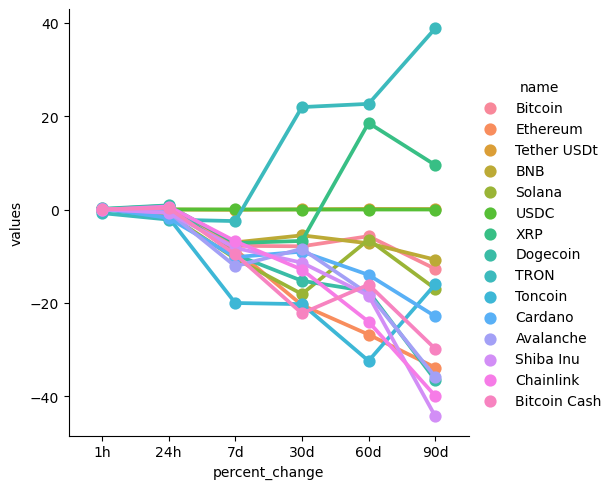

In [65]:
sns.catplot(x='percent_change', y = 'values', hue='name', data = df14, kind = 'point')

In [70]:
df15 = df[['name','quote.USD.price','timestamp']]
df15 = df15.query("name == 'Bitcoin'")
df15

,name,quote.USD.price,timestamp
0,Bitcoin,59160.61096,2024-08-31 17:04:36.785037
